<a href="https://colab.research.google.com/github/NishitSingh2023/NLP_PROJECT_LIDO/blob/master/NLP_on_Demo_Teacher_Reviews_1_14_Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re           
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from bs4 import BeautifulSoup 

# The DataSet taken Is from MetaBase Link :- 
https://metabase.lidolearning.com/question/2677?start_date=2020-10-01&end_date=2020-10-03

In [ ]:
# upload JUST the csv here
from google.colab import files 
uploaded = files.upload()

Saving reviews(1-14).csv to reviews(1-14).csv


In [ ]:
import io
## CSV name here 
data = pd.read_csv(io.BytesIO(uploaded['reviews(1-14).csv']))

In [ ]:
data.head()

,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns
0,1. Most of the times the screen share option c...,1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c...","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}"
1,aaditya tried everything but his mic did not w...,1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717...","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}"
2,activities are not visible\n,1.0,06611ce3-2636-4060-8fe6-beff2a09a7c0,Meenakshi Nagpal,7988189284,41266605-d286-421f-be95-ed0423ba1d1d,2020-09-05T11:00:00+05:30,3,"{191a5fc4-debe-4108-adab-18e8bfe2ddcc,329d4597...","{HARSHPREET,""Palak goel "",SINCHANA}","{6239228140,9311489275,9740879988}"
3,"Anurag is having least intrest in this class, ...",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469...","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}"
4,At end of the class. I and aliza both face som...,1.0,55aebf7f-6a90-491e-931d-3e0e0666dca8,Riya Makhani,6353905546,61c64a19-4c80-4fd3-a67f-58e69037c1fb,2020-09-02T16:00:00+05:30,1,{5407c90c-ab9c-4228-b2a0-071d8e3d496f},{ALIZAA},{7417134771}


In [ ]:
data.shape

(3311, 11)

In [ ]:
data.dtypes

product_feedback     object
product_rating      float64
teacher_id           object
teacher_name         object
teacher_rmn           int64
vc_id                object
start_time           object
count_students        int64
student_ids          object
student_names        object
student_rmns         object
dtype: object

In [ ]:
data.isnull().sum()

product_feedback    2144
product_rating       869
teacher_id             0
teacher_name           0
teacher_rmn            0
vc_id                  0
start_time             0
count_students         0
student_ids            0
student_names          0
student_rmns           0
dtype: int64

In [ ]:
data.describe

<bound method NDFrame.describe of                                        product_feedback  ...                                   student_rmns
0     1. Most of the times the screen share option c...  ...             {8018256529,8126414600,9027917598}
1     aaditya tried everything but his mic did not w...  ...  {8387977000,9399073915,9587358465,9878138080}
2                         activities are  not visible\n  ...             {6239228140,9311489275,9740879988}
3     Anurag is having least intrest in this class, ...  ...             {7275767144,8979812304,9133095437}
4     At end of the class. I and aliza both face som...  ...                                   {7417134771}
...                                                 ...  ...                                            ...
3306                                                NaN  ...  {7993344999,9840201854,9872084244,9958714145}
3307                                                NaN  ...                        {7488079956,987342

### Total Rating including Null Values 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


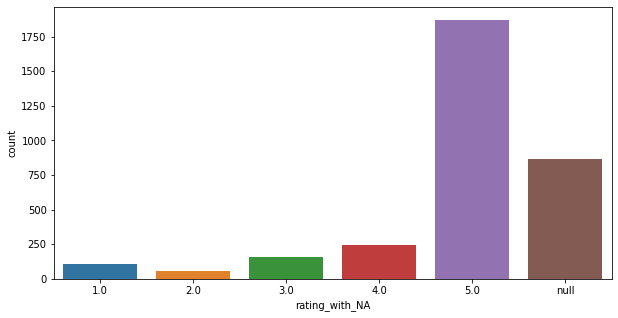

In [ ]:
plt.figure(figsize=(10,5))
data["rating_with_NA"] = data['product_rating'].fillna('null')
sns.countplot(data['rating_with_NA'])

### Total Reviews including Null Values 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Null Reviews')

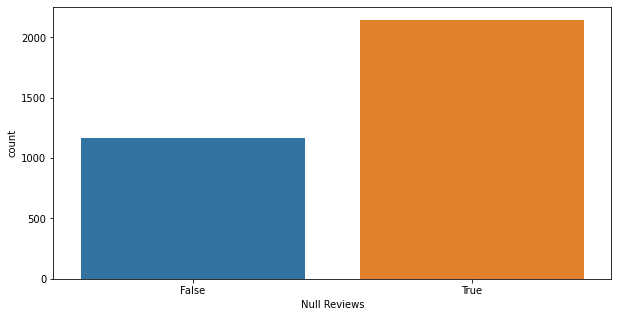

In [ ]:
plt.figure(figsize=(10,5))
ax =sns.countplot(data['product_feedback'].isnull())
ax.set_xlabel(xlabel="Null Reviews")

In [ ]:
data = data.dropna(subset=['product_feedback'])

## WordCloud

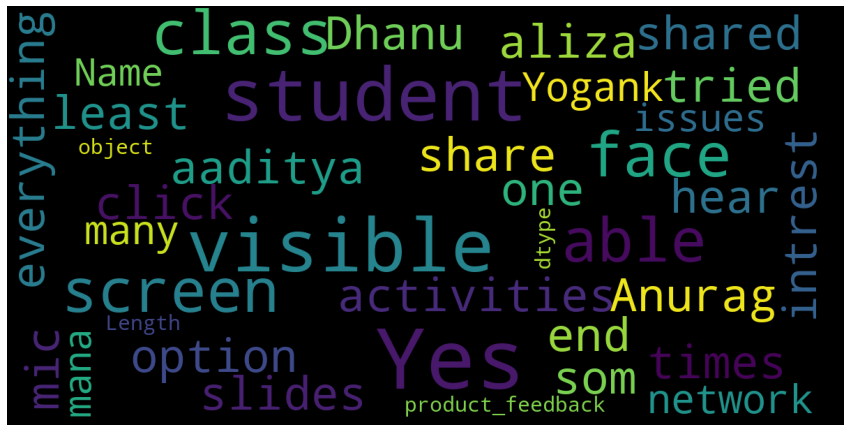

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['product_feedback'])

### Reviews_length and Number of reviews respect to Product_rating

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


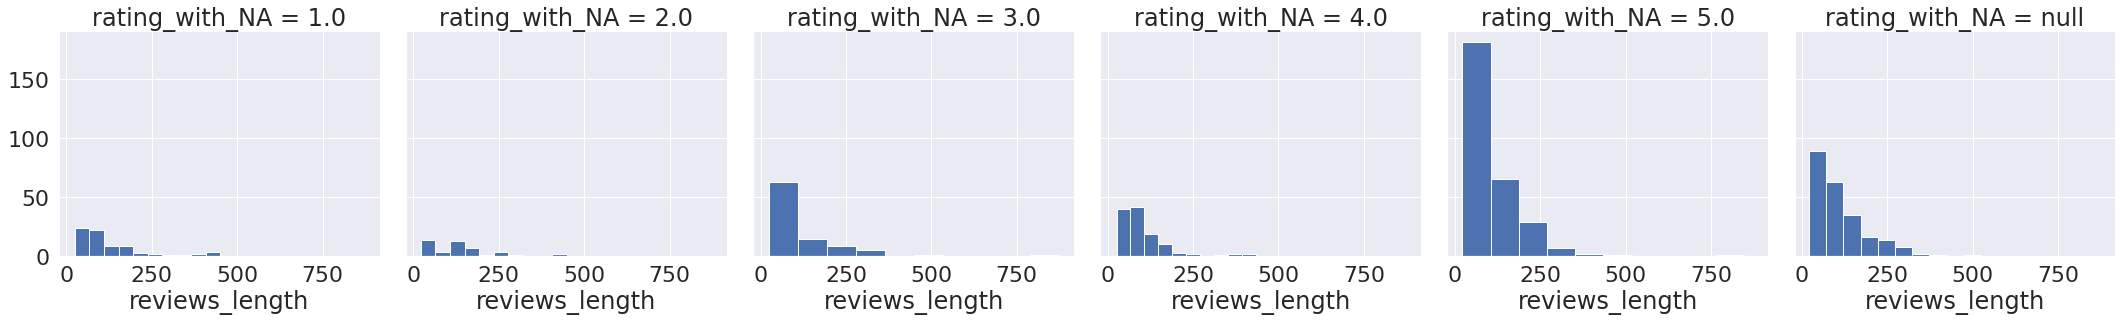

In [ ]:
data['reviews_length']=data['product_feedback'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='rating_with_NA',size=5)
g.map(plt.hist,'reviews_length')

## Correlation Plot

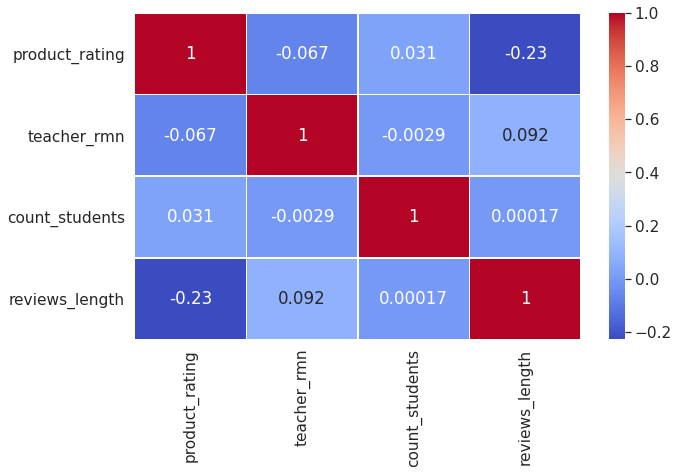

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linewidths=.5)

In [ ]:
all_text = data['product_feedback']
for i in range(min(10, len(all_text))):
    print(all_text[i])
    print("#========================================#")

1. Most of the times the screen share option creates technical issues and ruins the class. (Even when network is good).
2. Student (Saksham, Grade 7, Maths) had some issue after I tried sharing screen, he turned offline and was not able to re-login.
3. Game website on slide number 10 - (https://in.mathgames.com/skill/7.8-multiply-fractions) always takes a lot of time in opening.
#========================================#
aaditya tried everything but his mic did not work, kaveri was not near the screen but could hear her talking in the background  
#========================================#
activities are  not visible

#========================================#
Anurag is having least intrest in this class, but he is more focus on class book problem. I solve some .
Kartik join late but great student , weak in some sort of calculation.
#========================================#
At end of the class. I and aliza both face some networking issues. But I managed it and try to complete the clas

### Reviews_length and Number of reviews respect to product_rating and Count students in class

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


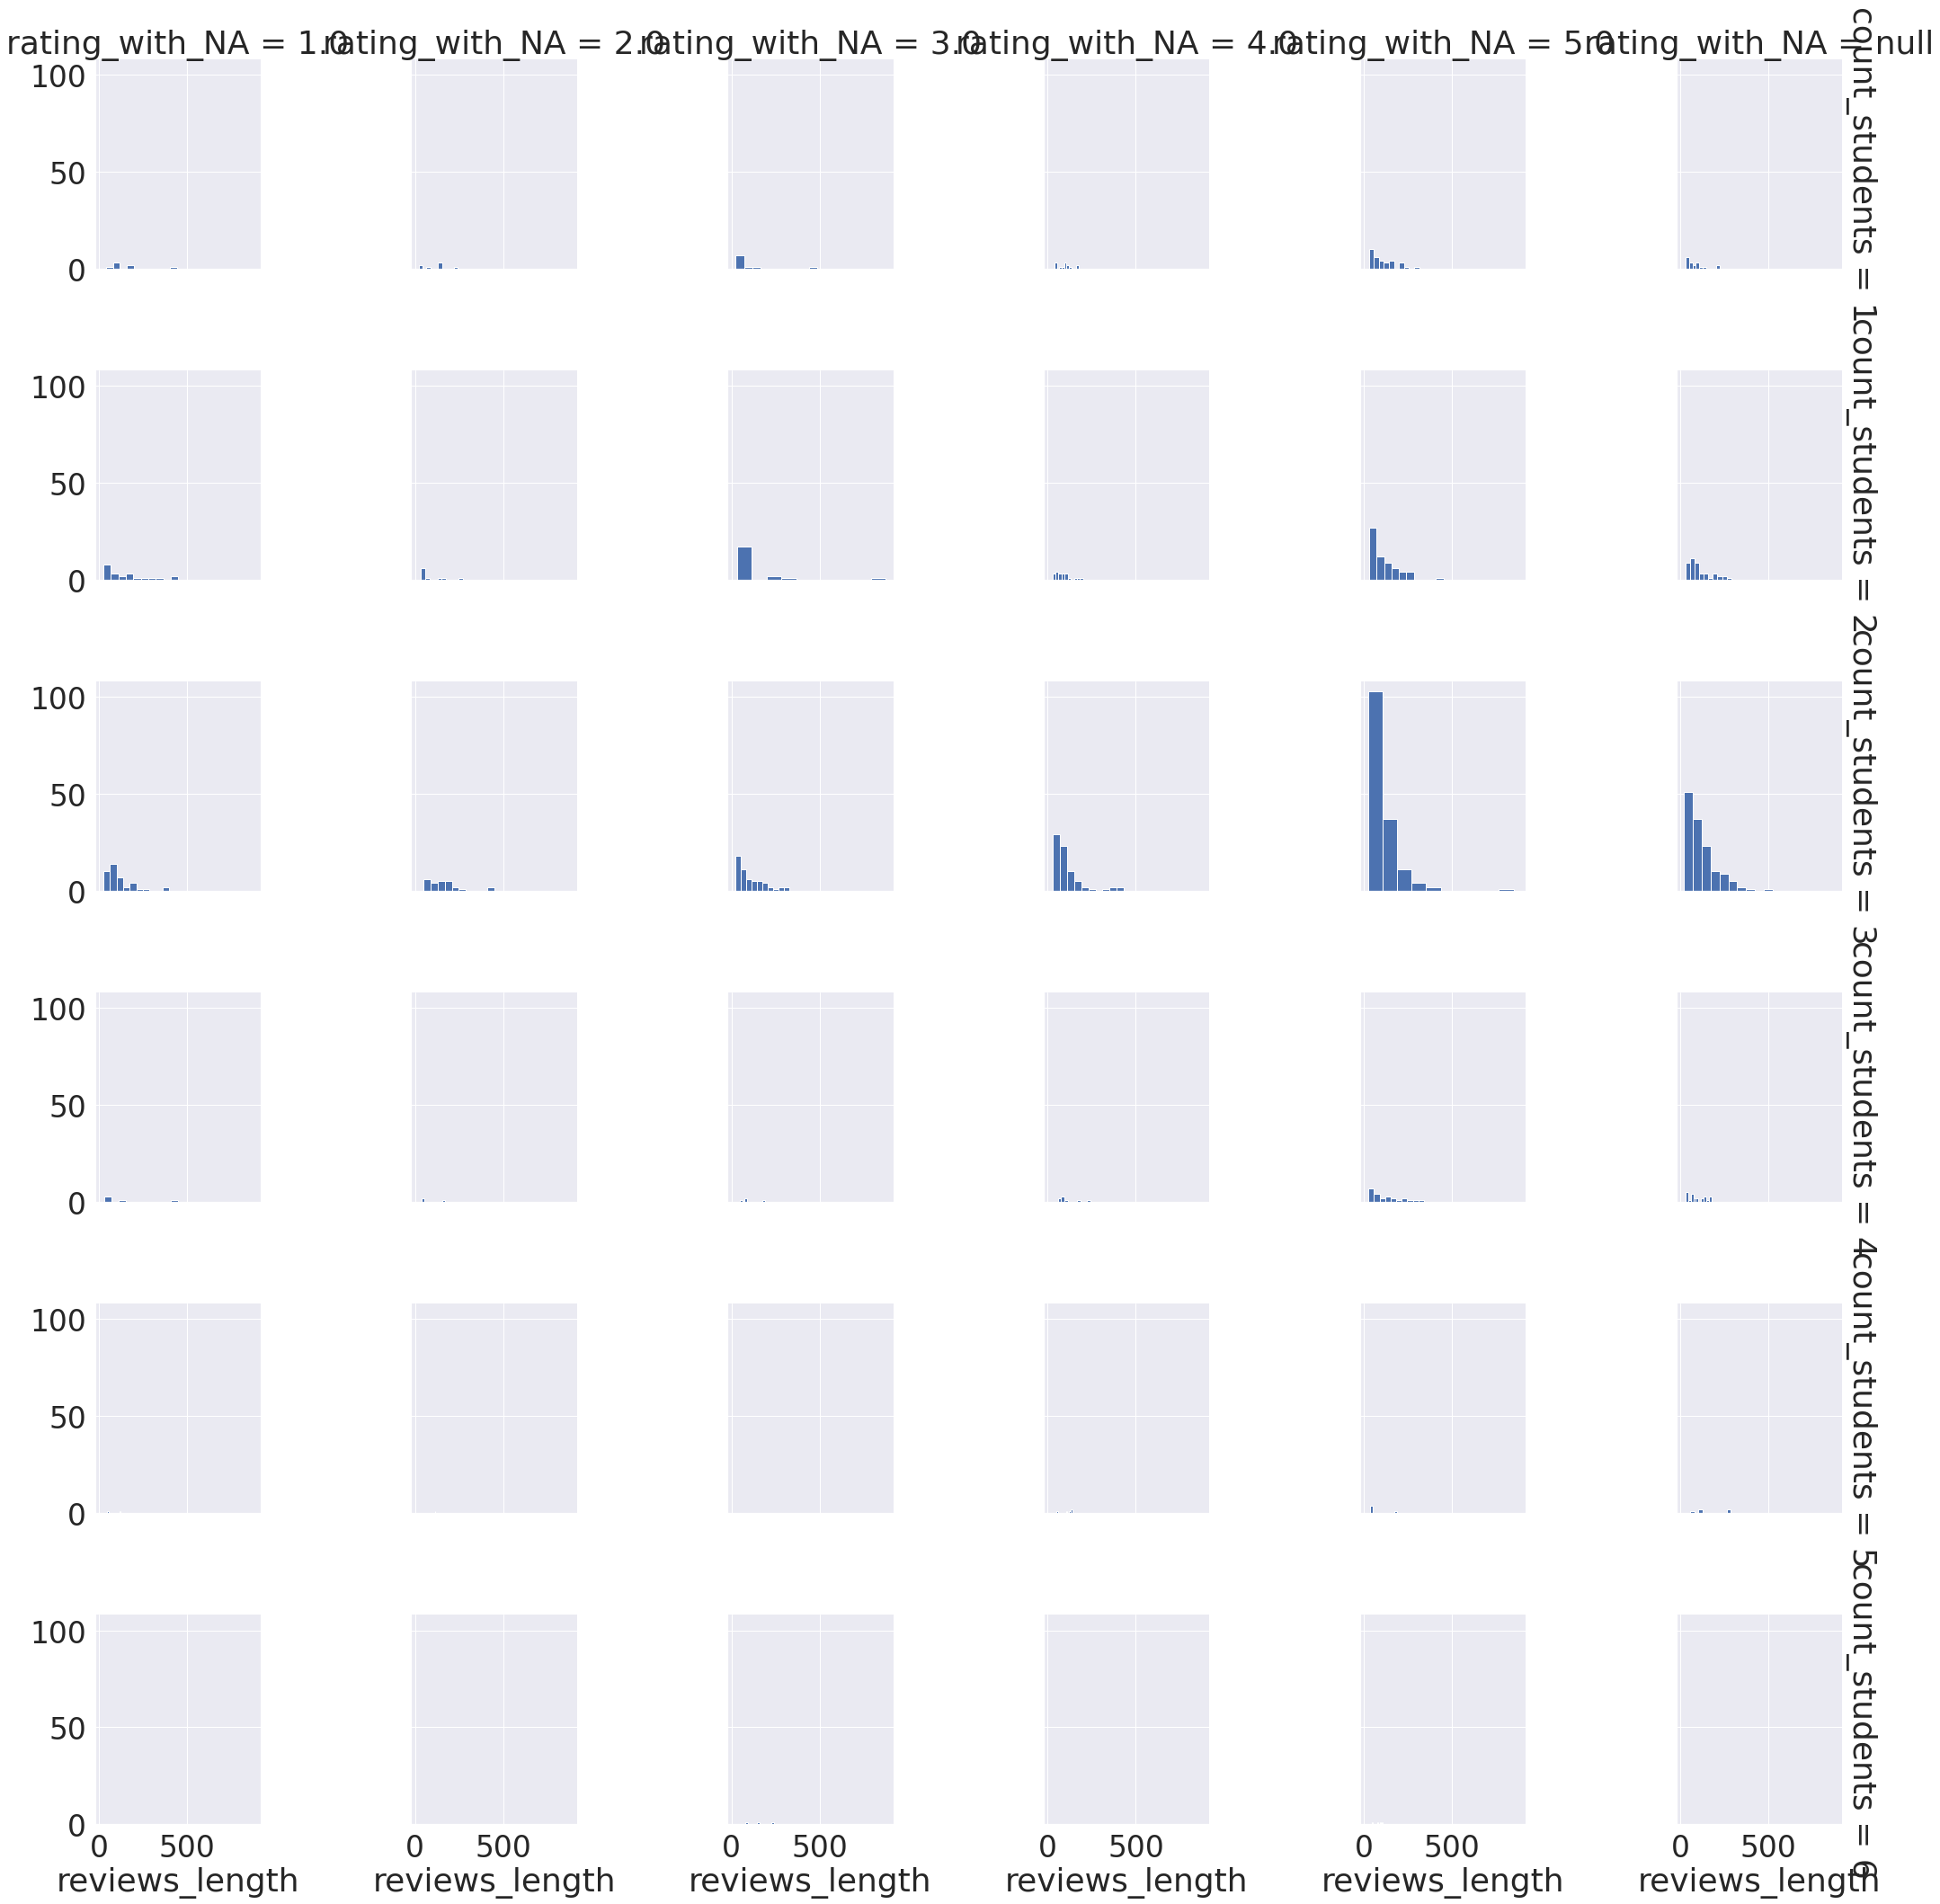

In [ ]:
sns.set(font_scale=3.0)

g = sns.FacetGrid(data,col='rating_with_NA', row= 'count_students',size=5, margin_titles=True)
g.map(plt.hist,'reviews_length')

## Text Cleaning

In [ ]:
##### Text Cleaning ######

#No of words in reviews
data['number_of_words'] = data.product_feedback.apply(lambda x: len(x.split()))

# Remove Cleaned Feedback
index_names = data[ data['number_of_words'] <= 4  ].index
data.drop(index_names, inplace = True) 

# Lower
data['cleaned_feedback'] = data['product_feedback'].str.lower() 

# Remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_urls(text))

# Remove Punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: remove_punctuation(text))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
data.shape

(853, 15)

## Word Net Lemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


## Correcting Spelling Mistakes

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9MB 2.9MB/s 


In [ ]:
# NOTE: WILL TAKE SOME TIME TO COMPLETE (SLOW PROCESS 5-10min)
# A good Idea would be to export the DATA to CSV to Avoid this step Again and again

from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
data['cleaned_feedback'] = data['cleaned_feedback'].apply(lambda text: correct_spellings(text))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data['cleaned_feedback']

0       1 most of the time the screen share option cre...
1       aaditya try everything but his mic do not work...
3       aura be have least interest in this class but ...
4       at end of the class i and liza both face some ...
5       at first my mic be not work so i ask to reload...
                              ...                        
2744    yes the screen that be share be not visible to...
2745             yes the slide be not visible for student
2746    yes the student dhani be not able to hear me e...
2747    yes the student be not able to click one of th...
2748    logan face so many network issue but i manage ...
Name: cleaned_feedback, Length: 853, dtype: object

## Sentiment Analysis

In [ ]:
pip install watson_developer_cloud

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 204kB 9.1MB/s 
  Created wheel for watson-developer-cloud: filename=watson_developer_cloud-2.10.1-cp36-none-any.whl size=252814 sha256=2df42cb546ec53a0de8d0e984866ccca6baea465fab40465a7f6b5139eee1cde
  Stored in directory: /root/.cache/pip/wheels/ea/a7/19/fac0a408a586265eb374005308a7553d4494ab41b2fd88f5bc
Successfully built watson-developer-cloud


In [ ]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [ ]:
natural_language_understanding = NaturalLanguageUnderstandingV1(                                         
    version='2020-08-01',
    iam_apikey='bXSAw6fRZRB4OJCfBNQgnGdH-h3KrkNs-bftWJwrbx73', # Use your API key here
    url='https://api.kr-seo.natural-language-understanding.watson.cloud.ibm.com/instances/0fcf4d52-23ce-47cc-ba82-d9f47e3735fe'
    )
def Sentiment_score(input_text): 
    # Input text can be sentence, paragraph or document
    response = natural_language_understanding.analyze (
    text = input_text,
    features = Features(sentiment=SentimentOptions()), language='en').get_result()
    # From the response extract score which is between -1 to 1
    res = response.get('sentiment').get('document').get('score')
    return res

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.
  after removing the cwd from sys.path.


#### Note: NLU are limited to 30,000 per month please **avoid running multiple times**

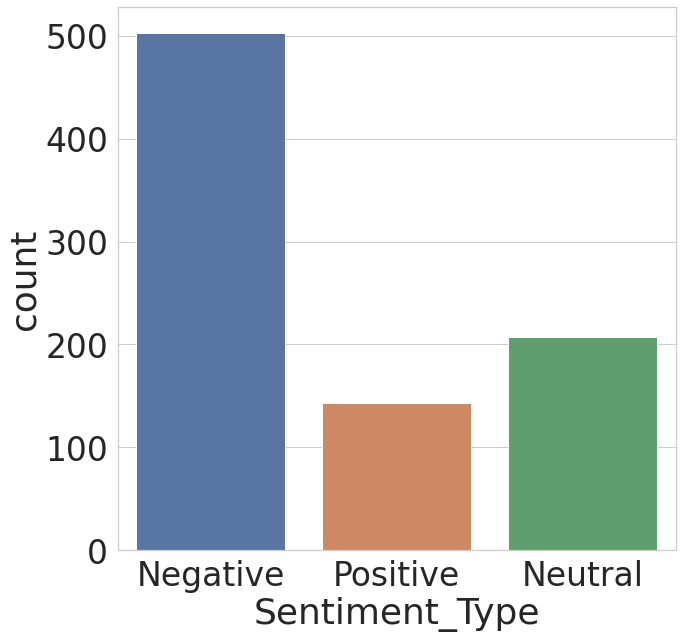

In [ ]:
# NOTE: WILL TAKE SOME TIME TO COMPLETE (SLOW PROCESS 5-10min)

list_desc = list()

df = data['cleaned_feedback'].astype(str)

def f(df):
    if df['sentiment'] > 0:
        val = "Positive"
    elif df['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

for row in df:
    list_desc.append((row, Sentiment_score(row)))
    df = pd.DataFrame(list_desc, columns = ['sentence','sentiment'])
    

df['Sentiment_Type'] = df.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df)

In [ ]:
df

,sentence,sentiment,Sentiment_Type
0,1 most of the time the screen share option cre...,-0.882468,Negative
1,aaditya try everything but his mic do not work...,-0.810417,Negative
2,aura be have least interest in this class but ...,-0.541781,Negative
3,at end of the class i and liza both face some ...,0.996917,Positive
4,at first my mic be not work so i ask to reload...,-0.969891,Negative
...,...,...,...
848,yes the screen that be share be not visible to...,0.681424,Positive
849,yes the slide be not visible for student,0.000000,Neutral
850,yes the student dhani be not able to hear me e...,-0.896833,Negative
851,yes the student be not able to click one of th...,-0.753344,Negative


In [ ]:
data.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

data = pd.concat( [data, df], axis=1) 

In [ ]:
data.head()

,product_feedback,product_rating,teacher_id,teacher_name,teacher_rmn,vc_id,start_time,count_students,student_ids,student_names,student_rmns,rating_with_NA,reviews_length,number_of_words,cleaned_feedback,sentence,sentiment,Sentiment_Type
0,1. Most of the times the screen share option c...,1.0,28e89e38-fb05-4082-84aa-1f9443d43383,Lalit Upadhyay,9004097187,4fc2f040-aaef-4e2e-9c9d-101d3f5b7bc6,2020-09-05T16:00:00+05:30,3,"{76dd93d7-0336-4e49-b3bd-1fe92e6ca289,9af94c6c...","{Sachi,SAKSHAM,Tanesh}","{8018256529,8126414600,9027917598}",1,381,61,1 most of the time the screen share option cre...,1 most of the time the screen share option cre...,-0.882468,Negative
1,aaditya tried everything but his mic did not w...,1.0,f09c9aef-c221-4858-b0b6-cfee341fa761,Vasundhara Guleria,8264861796,0c964071-5fc0-42a0-a6a9-d42cc59e0f61,2020-09-12T13:00:00+05:30,4,"{2543fa86-1748-4b31-a8ca-7040943f791e,5b471717...","{ADITYA,AWADH,KAVERI,""Zara Khan ""}","{8387977000,9399073915,9587358465,9878138080}",1,128,23,aaditya try everything but his mic do not work...,aaditya try everything but his mic do not work...,-0.810417,Negative
2,"Anurag is having least intrest in this class, ...",1.0,d73677b0-7f22-4028-8a76-1dcec5347ab4,Nirmal Kumar Singh,8982753944,cfc68463-3c65-4a9f-80fa-d0ad52ba136f,2020-09-09T18:00:00+05:30,3,"{5200eb31-49ec-4a2c-9170-4660d25e931b,523bf469...","{""Anurag "",""Ayan Ansari"",Karthik}","{7275767144,8979812304,9133095437}",1,175,34,aura be have least interest in this class but ...,aura be have least interest in this class but ...,-0.541781,Negative
3,At end of the class. I and aliza both face som...,1.0,55aebf7f-6a90-491e-931d-3e0e0666dca8,Riya Makhani,6353905546,61c64a19-4c80-4fd3-a67f-58e69037c1fb,2020-09-02T16:00:00+05:30,1,{5407c90c-ab9c-4228-b2a0-071d8e3d496f},{ALIZAA},{7417134771},1,179,36,at end of the class i and liza both face some ...,at end of the class i and liza both face some ...,0.996917,Positive
4,"at first, my mic was not working so I asked to...",1.0,92d28ccc-442f-4b22-8b2b-59d4c08471de,Shafiq Ur Rehman,9999094192,9c54d54c-c94c-4b5a-a2d6-f8467972325b,2020-09-02T18:00:00+05:30,1,{6ec42414-9846-4be8-91d9-6390985169a1},{SANU},{7906733631},1,188,37,at first my mic be not work so i ask to reload...,at first my mic be not work so i ask to reload...,-0.969891,Negative


In [ ]:
### Download CSV for this DataFrame if required 

data.to_csv('Updated_reviews.csv') 
files.download('Updated_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Checking a sample for False positives

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


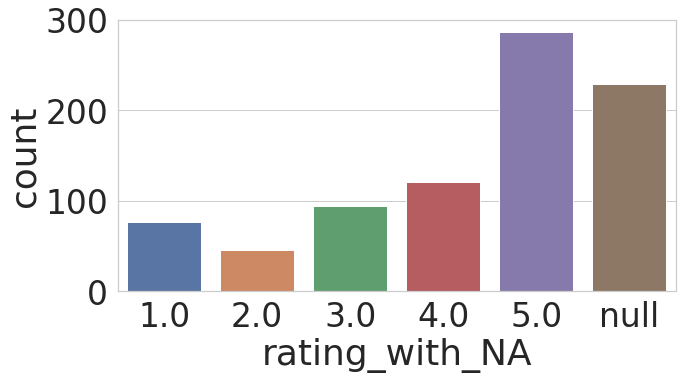

In [ ]:
plt.figure(figsize=(10,5))
data["rating_with_NA"] = data['product_rating'].fillna('null')
sns.countplot(data['rating_with_NA'])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


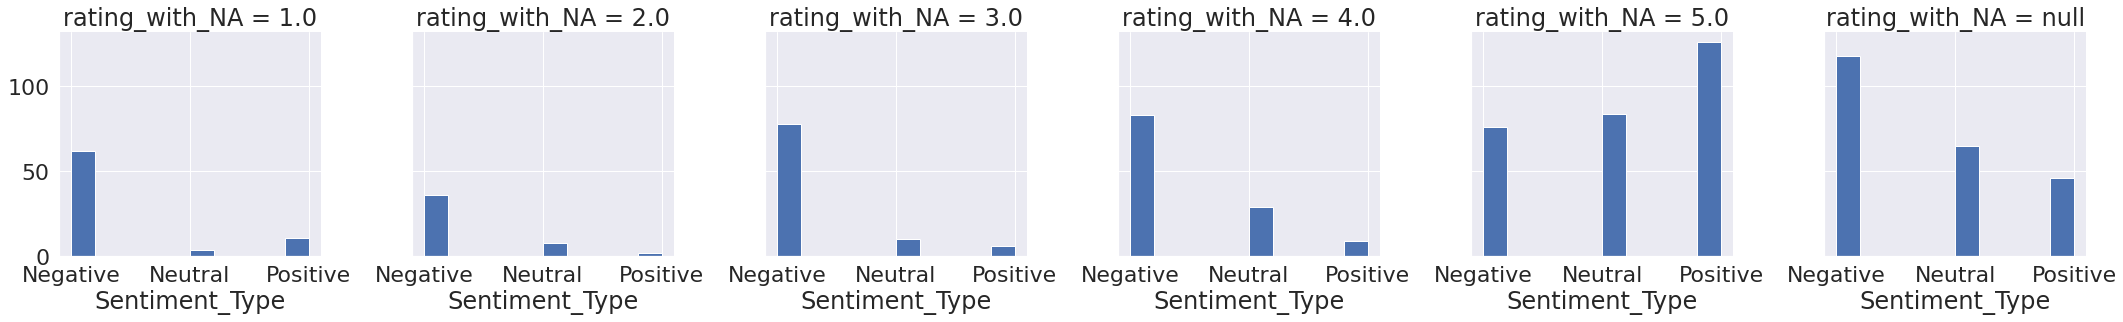

In [ ]:
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='rating_with_NA',size=5, margin_titles=True)
g.map(plt.hist,'Sentiment_Type')

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
data[['product_feedback','product_rating','Sentiment_Type']].sample(10, random_state = 100)

,product_feedback,product_rating,Sentiment_Type
824,The student name was Gulnas and not Aditya.,NaN,Neutral
489,No Technical issue from my side.\nThe student had some issues with internet connectivity. He was very happy to be in the class and was very excited. Please call the parents as they are interest to join.,5.0,Positive
509,"Pari was very much interested but due to network issues, she had audio problems - most of the time I could not hear her and some times she could nit hear me. She wants to repeat the demo.",5.0,Negative
134,"Facing screen issues again, especially at the last slide.",3.0,Negative
376,"Both the kids were good, Darshan had a lot of background noise.",5.0,Positive
458,"Manya joined the class on time , but i was not able to hear her , she got the class rescheduled . Khwaish joined the class 30mins late , we talked a little , advised him to reschedule .",5.0,Negative
574,Sumit and Vishal had very high engagement in spite of technical problems as they could not do all the external activities.,5.0,Negative
731,Nikitha joined using a tab and had very poor connectivity.,NaN,Negative
641,Ashlesha parents were not there .I explained Ashlesha in detail about Lido way of learning,NaN,Neutral
384,"call parents , his mom wants to know the fee structure.\nThanking you",5.0,Positive


### Sentiment Per Teacher

In [61]:
avg_feedback_length_per_teacher = data.groupby("teacher_name").agg({"number_of_words" : np.mean})
avg_feedback_length_per_teacher

,number_of_words
teacher_name,
Aanchal Chopra,7.000000
Aayushi Kumari,10.000000
Abhimanyu Chaudhary,36.846154
Abhishek Sharma,11.000000
Abhishikta,11.333333
...,...
Vignesh M,21.333333
Vivek Gaurav,16.000000
Vivek Surve,13.000000


In [62]:
avg_rating_per_teacher = data.groupby("teacher_name").agg({"product_rating" : np.mean})
avg_rating_per_teacher

,product_rating
teacher_name,
Aanchal Chopra,2.000000
Aayushi Kumari,2.500000
Abhimanyu Chaudhary,3.250000
Abhishek Sharma,1.000000
Abhishikta,1.000000
...,...
Vignesh M,3.166667
Vivek Gaurav,NaN
Vivek Surve,5.000000


In [63]:
count_feedback = data.groupby("teacher_name").agg({'teacher_name':'count'})
count_feedback

,teacher_name
teacher_name,
Aanchal Chopra,1
Aayushi Kumari,3
Abhimanyu Chaudhary,13
Abhishek Sharma,2
Abhishikta,3
...,...
Vignesh M,6
Vivek Gaurav,1
Vivek Surve,3


In [64]:
avg_emotion_per_teacher = data.groupby("teacher_name").agg({"sentiment" : np.mean})
avg_emotion_per_teacher

,sentiment
teacher_name,
Aanchal Chopra,-0.859555
Aayushi Kumari,-0.505406
Abhimanyu Chaudhary,-0.571796
Abhishek Sharma,-0.777345
Abhishikta,-0.178097
...,...
Vignesh M,-0.741586
Vivek Gaurav,0.376441
Vivek Surve,-0.188260


In [74]:
teacher_df = pd.concat([avg_feedback_length_per_teacher, avg_rating_per_teacher, count_feedback, avg_emotion_per_teacher], axis=1)
sorted_teacher_df = teacher_df.sort_values(by="sentiment", ascending=False, na_position='last')
sorted_teacher_df

,number_of_words,product_rating,teacher_name,sentiment
teacher_name,,,,
Ankita pandey,10.923077,5.000000,13,0.782206
Namira Kadri,16.000000,5.000000,1,0.496903
Himanshu Manral,17.695652,5.000000,23,0.488506
Bonuga Mounya,18.000000,NaN,2,0.436571
Navneet Khubber,13.000000,5.000000,1,0.385663
...,...,...,...,...
Mohanraj R,12.000000,1.000000,2,-0.907782
Anas khan,12.000000,3.000000,1,-0.919206
Soumodeep Bhowmick,21.000000,NaN,1,-0.922152


**NOTE: Every Column is AVG Except teacher name its is `Count of Feedback`**

In [75]:
### Download CSV for this DataFrame if required 


sorted_teacher_df.to_csv('teacher_data.csv') 
files.download('teacher_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>